In [5]:
!pip install mp-api

DEPRECATION: celery 5.1.2 has a non-standard dependency specifier pytz>dev. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
from mp_api.client import MPRester
api_key = "YOUR_API_KEY"

In [8]:
# documentation available at: https://api.materialsproject.org/docs

In [13]:
#We restrict to stable materials on the GGA/GGA+U hull with small bandgaps and metals

mpr = MPRester(api_key)

## -- Alternative directly using energy above hull:
docs = mpr.summary.search(energy_above_hull=(0, 0), fields=["band_gap""composition_reduced"])


/Users/helgesorenstein/mambaforge/lib/python3.10/site-packages/mp_api/client/mprester.py:182: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


Retrieving SummaryDoc documents:   0%|          | 0/6092 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/33990 [00:00<?, ?it/s]

In [78]:
import requests

url = 'https://api.materialsproject.org/materials/summary/'
params = {
  '_fields': 'band_gap,composition_reduced',
  '_all_fields': 'false',
  '_limit':1000
}
headers = {
  'accept': 'application/json',
  'X-API-KEY': '4ud8YgT5zr6QndPtfBOy8FhqvI06T5GF'
}

response = requests.get(url, params=params, headers=headers)


In [88]:
import requests
from tqdm import tqdm
reps = []
for i in tqdm(range(1, 100)):
    url = 'https://api.materialsproject.org/materials/summary/'
    params = {
    '_fields': 'band_gap,composition_reduced',
    '_all_fields': 'false',
    '_limit':1000,
    '_page': i
    }
    headers = {
    'accept': 'application/json',
    'X-API-KEY': '4ud8YgT5zr6QndPtfBOy8FhqvI06T5GF'
    }

    response = requests.get(url, params=params, headers=headers)
    reps.extend(response.json()['data'])

100%|██████████| 99/99 [02:09<00:00,  1.31s/it]


In [102]:
import pickle
f = open('mp_data.blabla', 'wb')
pickle.dump(reps, f)
f.close()

#open
f = open('mp_data.blabla', 'rb')

In [103]:
reps[3456]

{'composition_reduced': {'H': 8.0, 'Pt': 1.0, 'O': 6.0},
 'band_gap': 1.5662000000000003}

In [104]:
bandgap = []
formula = []
for e in reps:
    bandgap.append(e['band_gap'])
    formula.append(e['composition_reduced'])

In [105]:
elements = []
for f in formula:
    for k in f.keys():
        if k not in elements:
            elements.append(k)

In [106]:
len(elements)

86

In [93]:
elements.index('Mn')

36

In [107]:
import numpy as np
myMat = np.zeros([len(reps),len(elements)])
for i,f in enumerate(formula):
    for k in f.keys():
        myMat[i,elements.index(k)] = f[k]

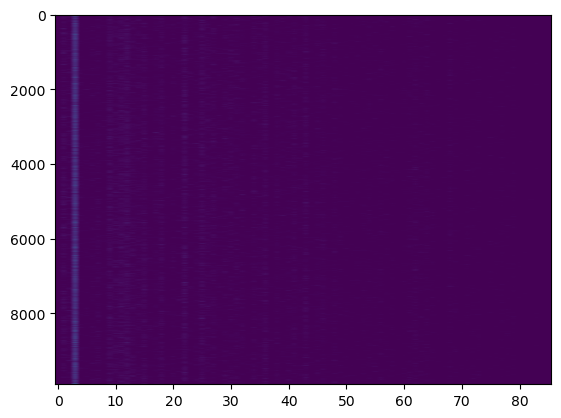

In [110]:
plt.imshow(np.sqrt(myMat), aspect='auto')

(array([4.892e+03, 1.080e+02, 1.120e+02, 9.200e+01, 7.800e+01, 8.700e+01,
        8.700e+01, 6.200e+01, 7.200e+01, 6.500e+01, 7.900e+01, 8.400e+01,
        6.200e+01, 6.800e+01, 6.300e+01, 5.300e+01, 6.400e+01, 5.500e+01,
        4.700e+01, 5.300e+01, 7.300e+01, 5.200e+01, 5.500e+01, 6.200e+01,
        5.600e+01, 6.100e+01, 4.400e+01, 5.000e+01, 5.400e+01, 5.400e+01,
        6.000e+01, 6.300e+01, 5.000e+01, 5.000e+01, 5.800e+01, 4.300e+01,
        5.000e+01, 6.200e+01, 4.300e+01, 4.300e+01, 5.200e+01, 3.700e+01,
        4.600e+01, 6.300e+01, 4.100e+01, 4.700e+01, 5.000e+01, 5.700e+01,
        5.000e+01, 6.100e+01, 4.600e+01, 4.500e+01, 4.000e+01, 5.900e+01,
        4.600e+01, 3.200e+01, 6.200e+01, 3.700e+01, 3.100e+01, 3.100e+01,
        3.900e+01, 4.200e+01, 4.000e+01, 3.800e+01, 3.700e+01, 4.200e+01,
        3.900e+01, 3.900e+01, 2.800e+01, 4.000e+01, 4.400e+01, 3.700e+01,
        4.200e+01, 2.900e+01, 3.500e+01, 3.200e+01, 3.900e+01, 2.400e+01,
        3.300e+01, 3.000e+01, 3.000e+0

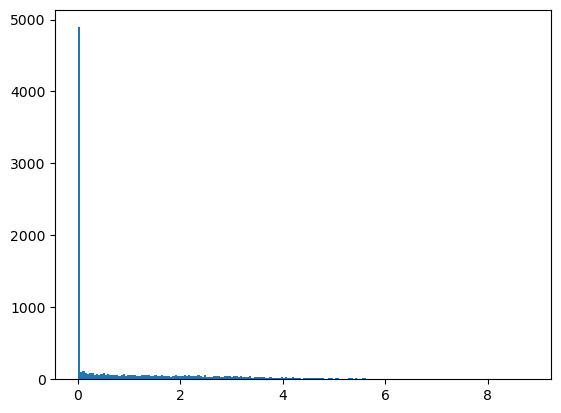

In [112]:
import matplotlib.pyplot as plt

plt.hist(bandgap, bins=200)

In [144]:
y_train

[2.1205,
 0.0,
 0.0,
 2.6583999999999994,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.4295,
 0.0,
 3.2577000000000003,
 0.9887999999999995,
 0.09360000000000013,
 2.1889,
 0.48240000000000016,
 0.0,
 1.8021,
 4.3426,
 0.0,
 0.0,
 0.7389000000000001,
 0.0,
 4.3086,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0805,
 0.0,
 0.0,
 0.12609999999999993,
 2.4991999999999996,
 0.0,
 0.0,
 0.0,
 3.8676,
 0.0,
 0.0,
 0.6227999999999998,
 0.0,
 0.7799000000000005,
 0.0,
 0.0,
 1.1737000000000002,
 0.0,
 0.0,
 2.0838999999999994,
 0.27280000000000015,
 0.20620000000000083,
 0.1596000000000002,
 4.1017,
 0.0,
 1.1999999999999997,
 0.0,
 5.5631,
 0.05479999999999996,
 0.0,
 0.9561999999999999,
 0.9751999999999996,
 0.0,
 1.3217000000000003,
 0.010800000000000587,
 0.07489999999999997,
 2.1872000000000003,
 0.0,
 0.0,
 0.11540000000000017,
 1.6282999999999999,
 0.06729999999999992,
 0.3638999999999992,
 0.9075999999999995,
 0.0,
 0.0,
 0.0,
 0.42100000000000026,
 0.0,
 0.23879999999999946,
 4.741899999999999,
 3.0053

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(myMat, np.array(bandgap), test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [160]:
from keras.layers import Input, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.models import Model
from keras.losses import mean_squared_error

input = Input(shape=(len(elements),))
layer1 = Dense(10, activation='tanh')(input)
bn1 = BatchNormalization()(layer1)
layer2 = Dense(10, activation='tanh')(bn1)
bn2 = BatchNormalization()(layer2)
bottleneck = Dense(2, activation='tanh')(bn2)
bn3 = BatchNormalization()(bottleneck)
layer3 = Dense(10, activation='tanh')(bn3)
out = Dense(1, activation='linear')(layer3)

model_gesamt = Model(input, out)
model_bott = Model(input, bottleneck)

model_gesamt.compile(optimizer=Adam(), loss='mse')
model_gesamt.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 86)]              0         
                                                                 
 dense_15 (Dense)            (None, 10)                870       
                                                                 
 batch_normalization_9 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_10 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 2)                 22  

In [161]:
hist = model_gesamt.fit(X_train, np.array(y_train), validation_data=(X_val, np.array(y_val)), epochs=100, batch_size=32)

Epoch 1/100
186/186 [==============================] - 0s 1ms/step - loss: 2.3825 - val_loss: 1.6160
Epoch 2/100
186/186 [==============================] - 0s 683us/step - loss: 1.6106 - val_loss: 1.4295
Epoch 3/100
186/186 [==============================] - 0s 675us/step - loss: 1.4607 - val_loss: 1.3608
Epoch 4/100
186/186 [==============================] - 0s 662us/step - loss: 1.3836 - val_loss: 1.3068
Epoch 5/100
186/186 [==============================] - 0s 670us/step - loss: 1.3176 - val_loss: 1.2631
Epoch 6/100
186/186 [==============================] - 0s 860us/step - loss: 1.2919 - val_loss: 1.2281
Epoch 7/100
186/186 [==============================] - 0s 683us/step - loss: 1.2352 - val_loss: 1.2215
Epoch 8/100
186/186 [==============================] - 0s 671us/step - loss: 1.1973 - val_loss: 1.1779
Epoch 9/100
186/186 [==============================] - 0s 671us/step - loss: 1.1987 - val_loss: 1.1618
Epoch 10/100
186/186 [==============================] - 0s 662us/step - los

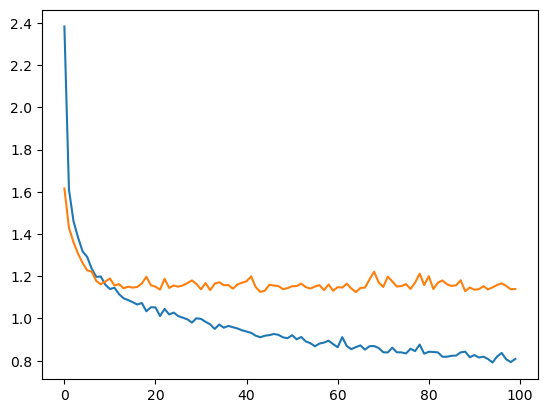

In [163]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [164]:
y_pred = model_gesamt.predict(X_test)

62/62 [==============================] - 0s 387us/step


In [166]:
y_test.shape

(1980,)

In [169]:
y_pred.reshape(-1)

array([0.1604093 , 0.41081688, 0.80527467, ..., 0.43614697, 2.8840384 ,
       0.60410655], dtype=float32)

In [170]:
y_pred.flatten()

array([0.1604093 , 0.41081688, 0.80527467, ..., 0.43614697, 2.8840384 ,
       0.60410655], dtype=float32)

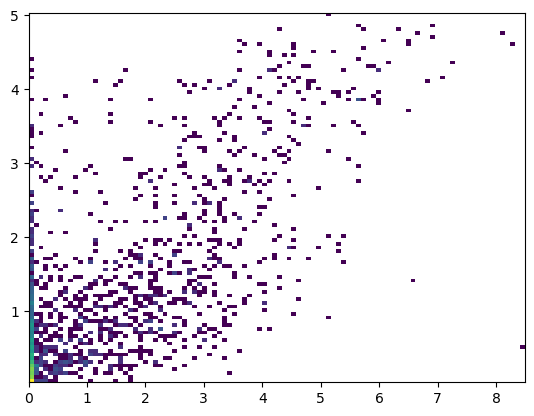

In [175]:
from matplotlib.colors import LogNorm

_ = plt.hist2d(y_test, y_pred.flatten(), 100, norm=LogNorm())

In [176]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred.flatten())

0.5407113712727621

In [228]:
from keras.layers import Input, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.models import Model
from keras.losses import mean_squared_error
from keras.callbacks import EarlyStopping

input = Input(shape=(len(elements),))
layer1 = Dense(10, activation='tanh')(input)
bn1 = BatchNormalization()(layer1)
layer2 = Dense(5, activation='tanh')(bn1)
bn2 = BatchNormalization()(layer2)
bottleneck = Dense(2, activation='tanh')(bn2)
bn3 = BatchNormalization()(bottleneck)
layer3 = Dense(2, activation='tanh')(bn3)
out = Dense(1, activation='tanh')(layer3)

model_gesamt = Model(input, out)
model_bott = Model(input, bottleneck)
model_emb = Model(input, layer1)

model_gesamt.compile(optimizer=Adam(), loss='binary_crossentropy')
model_gesamt.summary()

from sklearn.model_selection import train_test_split

sc_or_not = np.array([0 if e < 0.01 else 1 for e in bandgap])

X_train, X_test, y_train, y_test = train_test_split(myMat, sc_or_not, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

es = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=100,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

hist = model_gesamt.fit(X_train, np.array(y_train), validation_data=(X_val, np.array(y_val)), epochs=1000, batch_size=512, callbacks=[es])

Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 86)]              0         
                                                                 
 dense_100 (Dense)           (None, 10)                870       
                                                                 
 batch_normalization_60 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_101 (Dense)           (None, 5)                 55        
                                                                 
 batch_normalization_61 (Bat  (None, 5)                20        
 chNormalization)                                                
                                                                 
 dense_102 (Dense)           (None, 2)                 12 

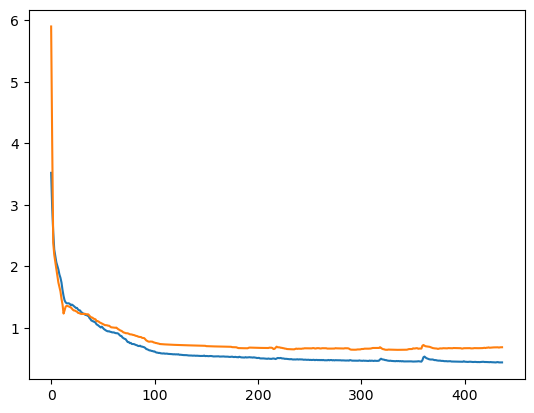

In [229]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [230]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model_gesamt.predict(X_test)
y_pred = [1 if e > 0.5 else 0 for e in y_pred]
confusion_matrix(y_test, y_pred)

print('Accuracy:', (confusion_matrix(y_test, y_pred)[0,0]+confusion_matrix(y_test, y_pred)[1,1])/len(y_test))

62/62 [==============================] - 0s 393us/step
Accuracy: 0.7712121212121212


In [231]:
bott = model_bott.predict(X_test)

62/62 [==============================] - 0s 350us/step


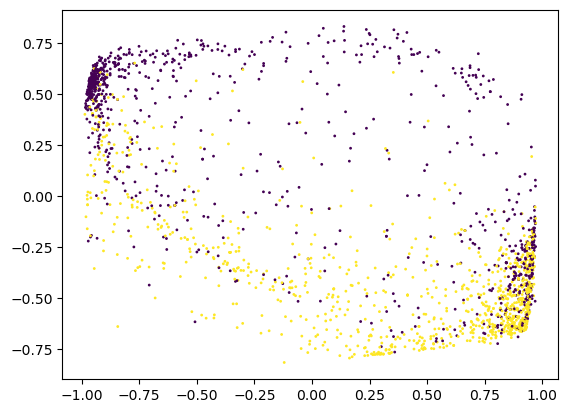

In [232]:
plt.scatter(bott[:,0], bott[:,1], c=y_test,s=1)

In [236]:
from umap import UMAP
embedding_dim = 2
umap = UMAP(n_components=embedding_dim)
X_umap = umap.fit_transform(X_test)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [234]:
!pip install umap-learn

DEPRECATION: celery 5.1.2 has a non-standard dependency specifier pytz>dev. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


/var/folders/gf/ksqjl6fj4zj55hdfzlttfvwr0000gn/T/ipykernel_32518/4029366364.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(X_umap[:,0], X_umap[:,1], c=np.log(X_test[:,3]), s=1)


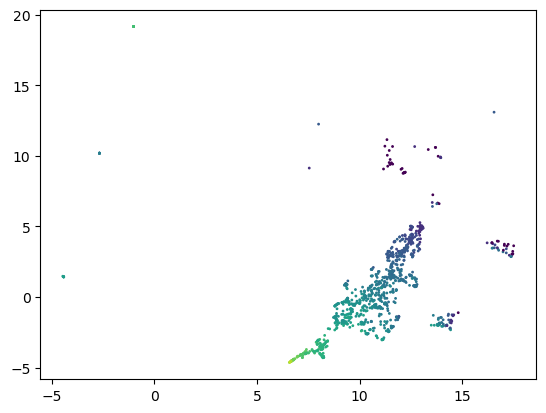

In [248]:
plt.scatter(X_umap[:,0], X_umap[:,1], c=np.log(X_test[:,3]), s=1)

/var/folders/gf/ksqjl6fj4zj55hdfzlttfvwr0000gn/T/ipykernel_32518/2905355914.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(X_umap[:,0], X_umap[:,1], c=np.log(X_test[:,2]), s=1)


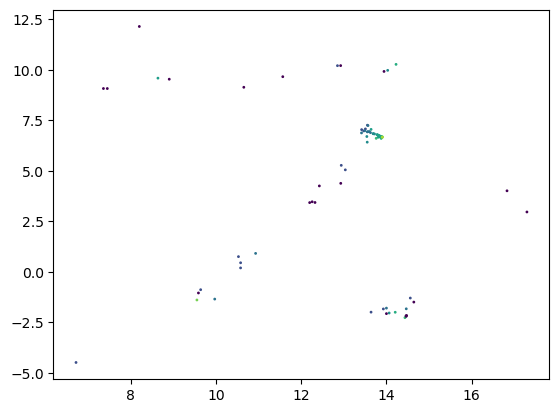

In [250]:
plt.scatter(X_umap[:,0], X_umap[:,1], c=np.log(X_test[:,2]), s=1)